<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP_Integer_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dictionary 사용하여 Encoding
## 과정을 보기에는 좋으나 방법으로는 추천하지 않음.

In [6]:
# Integer Encoding
# 숫자를 더 빠르게 처리하기 때문에 text -> number로 매핑하는 작업이 필요.
# 단어를 빈도수 순으로 정렬한 단어 집합을 하나 만들고, 빈도수가 높은 순서대로 낮은 숫자를 부여할 수 있다.

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

sentences = sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [10]:
vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
  # word tokenize
  tokenized_sentence = word_tokenize(sentence)
  result = []
  #print(tokenized_sentence)

  for word in tokenized_sentence:
    word = word.lower() #단어의 소문자화
    if word not in stop_words:
      if len(word)>2: #2글자보다 긴 단어는 word에 추가한다.
        result.append(word)
        if word not in vocab:
          vocab[word] = 0
        vocab[word] += 1
  preprocessed_sentences.append(result)
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


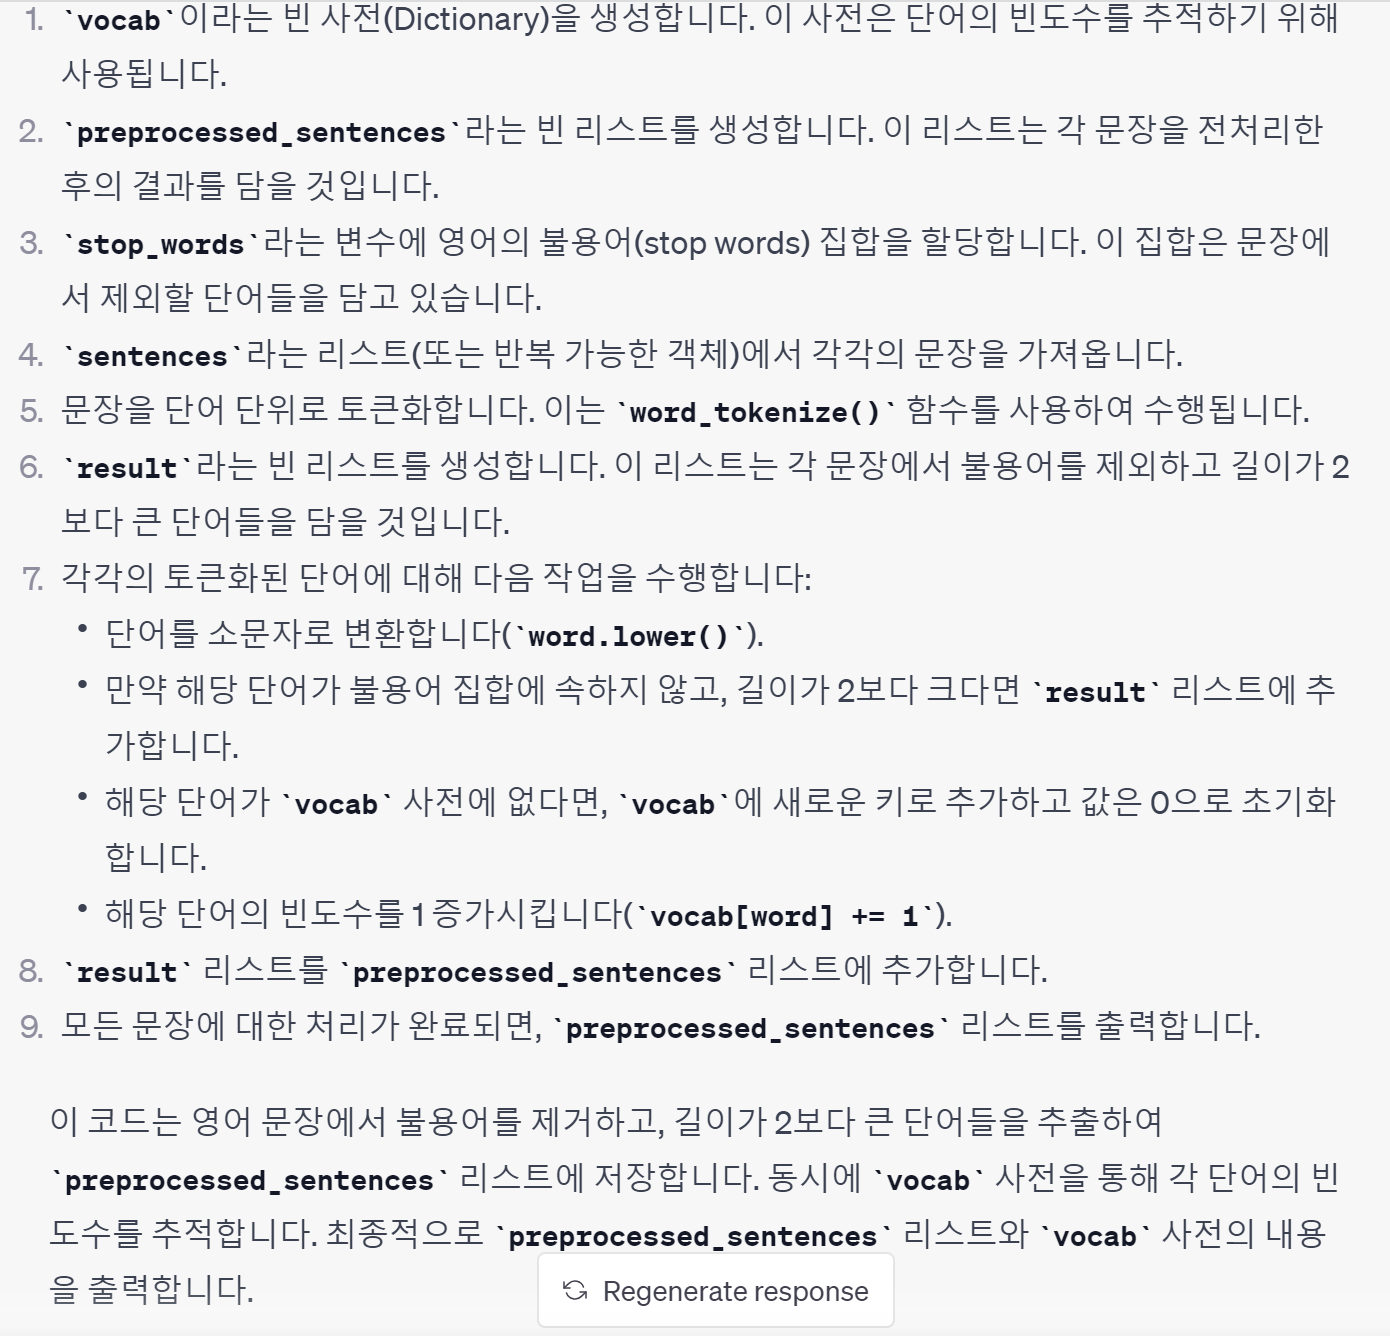

In [11]:
print('단어 집합', vocab)

단어 집합 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [12]:
# 빈도수 출력
print(vocab['barber'])

8


In [14]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

# items() 함수를 사용하여 사전의 키-값 쌍을 가져오기.
# 소트로 정렬
# 빈도수 기준 정렬하기 위해 람다 함수 사용. lambda x: x[1]은 각 튜플의 두 번째 요소(빈도수)를 기준으로 정렬

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [42]:
word_to_index = {} #dictionary형
i = 0 #단어 인덱스가 될 것.
for (word, frequency) in vocab_sorted:
  if frequency > 1:
    i = i + 1
    word_to_index[word] = i

print(word_to_index)

#빈도수가 1인 단어는 제외시킴.

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


#### word_to_index[word] = i는 word를 i로 매핑하여 word_to_index 사전에 추가하는 구문입니다.

#### 반복문을 통해 vocab_sorted 리스트에서 단어와 빈도수를 가져올 때, i 변수는 1씩 증가하면서 단어의 인덱스를 나타냅니다. 따라서 각 단어에 대해 고유한 인덱스가 할당됩니다.

#### word_to_index[word] = i 구문은 이러한 단어와 인덱스를 word_to_index 사전에 추가하는 역할을 합니다. 즉, 단어 word를 키(key)로, 해당 단어의 인덱스 i를 값(value)으로 매핑하여 word_to_index 사전에 저장합니다.

#### 이렇게 생성된 word_to_index 사전은 단어를 인덱스로 변환하는 데 사용될 수 있습니다. 예를 들어, 텍스트 데이터에서 각 단어를 해당 인덱스로 대체하여 숫자로 표현할 수 있습니다.

In [17]:
#빈도수 상위 5개 단위만 사용하기.

vocab_size = 5

#index가 5 초과인 단어 제거하기.
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]

# 해당 단어에 대한 인덱스 정보 삭제하기.
for w in words_frequency:
  del word_to_index[w]
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


#### 위 코드에서 word for word는 리스트 컴프리헨션에서 반환될 요소입니다. word는 각 반복에서 word_to_index.items()에서 추출된 키(key)에 해당하는 변수입니다.

#### 따라서 코드의 의미는 word_to_index 사전에서 인덱스가 vocab_size + 1 이상인 단어들을 추출하여 리스트로 반환하는 것입니다.

In [18]:
# 상위 5개 단어만 사용함으로써 단어 집합에서 사라진 단어가 생김. (Out Of Vocabulary)
# word to index dictionary에 OOV 추가하기.

word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [20]:
# Encoding
encoded_sentences = []
for sentence in preprocessed_sentences:
  encoded_sentence = []
  for word in sentence:
    try:
      #단어 집합에 있는 단어라면 해당 단어의 index를 리턴.
      encoded_sentence.append(word_to_index[word])
    except KeyError:
      #단어 집합에 없다면 OOV index를 리턴
      encoded_sentence.append(word_to_index['OOV'])
  encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


# 2. Counter 사용하기

In [22]:
from collections import Counter

In [23]:
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [24]:
all_words_list = sum(preprocessed_sentences, [])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [27]:
#Counter 모듈을 사용하여 단어의 빈도수를 count할 수 있음.

vocab = Counter(all_words_list)
#print(vocab)

#빈도수 출력
print(vocab['barber'])

8


In [28]:
# most_common()을 사용해서 상위 5개의 빈도만 출력해보기.
vocab_size = 5
vocab = vocab.most_common(vocab_size)
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [29]:
word_to_index = {}
i = 0
for (word, frequency) in vocab:
  i = i + 1
  word_to_index[word] = i #단어를 i라는 정수로 매핑, 위에서 설명 붙여넣기한 것 기억하기.

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [39]:
word_to_index['OOV'] = len(word_to_index)
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [41]:
# Encoding
encoded_sentences = []
for sentence in preprocessed_sentences:
  encoded_sentence = []
  for word in sentence:
    try:
      #단어 집합에 있는 단어라면 해당 단어의 index를 리턴.
      encoded_sentence.append(word_to_index[word])
    except KeyError:
      #단어 집합에 없다면 OOV index를 리턴
      encoded_sentence.append(word_to_index['OOV'])
  encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


# 3. NLTK의 FreqDist 사용하기.

In [30]:
from nltk import FreqDist
import numpy as np

In [32]:
# np.hstack으로 문장 구분 제거하기.
vocab = FreqDist(np.hstack(preprocessed_sentences))
print(vocab)

#빈도수 출력
print(vocab['barber'])

<FreqDist with 13 samples and 36 outcomes>
8


In [33]:
# 상위 5개 빈도 단어 집합 저장하기.

vocab_size = 5
vocab = vocab.most_common(vocab_size)
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [34]:
#enumerate 함수를 사용해서 인덱스 부여하기. (간단한 코드)
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


#### enumerate 간단한 정리

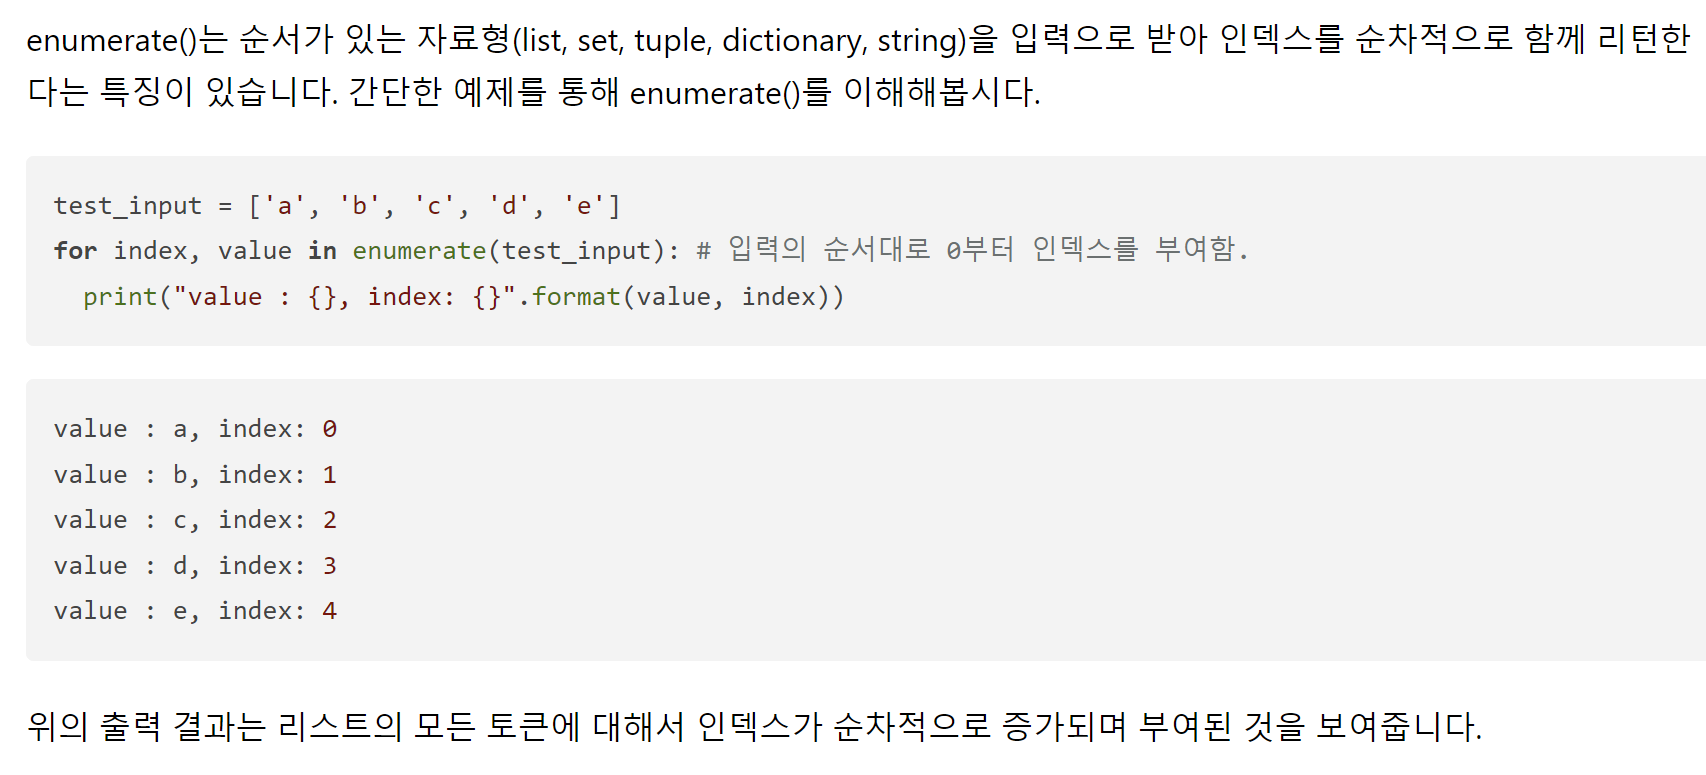

In [35]:
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [36]:
# Encoding
encoded_sentences = []
for sentence in preprocessed_sentences:
  encoded_sentence = []
  for word in sentence:
    try:
      #단어 집합에 있는 단어라면 해당 단어의 index를 리턴.
      encoded_sentence.append(word_to_index[word])
    except KeyError:
      #단어 집합에 없다면 OOV index를 리턴
      encoded_sentence.append(word_to_index['OOV'])
  encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]
